In [79]:
import os
import numpy as np
import pandas as pd
import kagglehub

In [80]:
# Download latest version
path = kagglehub.dataset_download("xfkzujqjvx97n/football-datasets")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'football-datasets' dataset.
Path to dataset files: /kaggle/input/football-datasets


In [81]:
# List the contents of the downloaded dataset directory
dataset_files = os.listdir(path)

print("Files in the dataset directory:")
for file_name in dataset_files:
    print(file_name)

Files in the dataset directory:
team_competitions_seasons
transfer_history
team_children
player_performances
team_details
player_profiles
player_injuries
player_national_performances
player_market_value
player_latest_market_value
player_teammates_played_with


In [82]:
dataframes = {}
for entry_name in dataset_files: # dataset_files contains directory names
    entry_path = os.path.join(path, entry_name)

    if os.path.isdir(entry_path):
        print(f"Entering directory: {entry_name}")
        for file_name_in_dir in os.listdir(entry_path):
            full_file_path = os.path.join(entry_path, file_name_in_dir)
            if os.path.isfile(full_file_path) and file_name_in_dir.endswith('.csv'):
                key_name = file_name_in_dir.replace('-', '_').replace(' ', '').replace('.csv', '')
                try:
                    dataframes[key_name] = pd.read_csv(full_file_path)
                    print(f"Loaded {key_name} from {full_file_path}")
                except Exception as e:
                    print(f"Error loading {full_file_path}: {e}")
            else:
                print(f"Skipping non-CSV file or directory in {entry_name}: {file_name_in_dir}")
    elif os.path.isfile(entry_path) and entry_name.endswith('.csv'):
        # This case is less likely given the current `dataset_files` but good to keep
        key_name = entry_name.replace('-', '_').replace(' ', '').replace('.csv', '')
        try:
            dataframes[key_name] = pd.read_csv(entry_path)
            print(f"Loaded {key_name} from {entry_path}")
        except Exception as e:
            print(f"Error loading {entry_path}: {e}")
    else:
        print(f"Skipping unexpected item (not a directory or CSV file directly at root): {entry_name}")

print(f"Successfully loaded {len(dataframes)} dataframes.")

Entering directory: team_competitions_seasons
Loaded team_competitions_seasons from /kaggle/input/football-datasets/team_competitions_seasons/team_competitions_seasons.csv
Entering directory: transfer_history
Loaded transfer_history from /kaggle/input/football-datasets/transfer_history/transfer_history.csv
Entering directory: team_children
Loaded team_children from /kaggle/input/football-datasets/team_children/team_children.csv
Entering directory: player_performances
Loaded player_performances from /kaggle/input/football-datasets/player_performances/player_performances.csv
Entering directory: team_details
Loaded team_details from /kaggle/input/football-datasets/team_details/team_details.csv
Entering directory: player_profiles


/tmp/ipython-input-1222268952.py:12: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[key_name] = pd.read_csv(full_file_path)


Loaded player_profiles from /kaggle/input/football-datasets/player_profiles/player_profiles.csv
Entering directory: player_injuries
Loaded player_injuries from /kaggle/input/football-datasets/player_injuries/player_injuries.csv
Entering directory: player_national_performances
Loaded player_national_performances from /kaggle/input/football-datasets/player_national_performances/player_national_performances.csv
Entering directory: player_market_value
Loaded player_market_value from /kaggle/input/football-datasets/player_market_value/player_market_value.csv
Entering directory: player_latest_market_value
Loaded player_latest_market_value from /kaggle/input/football-datasets/player_latest_market_value/player_latest_market_value.csv
Entering directory: player_teammates_played_with
Loaded player_teammates_played_with from /kaggle/input/football-datasets/player_teammates_played_with/player_teammates_played_with.csv
Successfully loaded 11 dataframes.


In [83]:
player_profiles_df = dataframes['player_profiles']

player_profiles_df.head()

,player_id,player_slug,player_name,player_image_url,name_in_home_country,date_of_birth,place_of_birth,country_of_birth,height,citizenship,...,on_loan_from_club_id,on_loan_from_club_name,contract_there_expires,second_club_url,second_club_name,third_club_url,third_club_name,fourth_club_url,fourth_club_name,date_of_death
0,1,silvio-adzic,Silvio Adzic (1),https://img.a.transfermarkt.technology/portrai...,NaN,1980-09-23,Grünstadt,Germany,0.0,Germany,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100011,everton-silva,Éverton Silva (100011),https://img.a.transfermarkt.technology/portrai...,Éverton José Modesto da Silva,1988-08-04,São João de Meriti,Brazil,171.0,Brazil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,miroslav-klose,Miroslav Klose (10),https://img.a.transfermarkt.technology/portrai...,Miroslav Josef Klose,1978-06-09,Opole,Germany,184.0,Germany,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,john-thompson,John Thompson (10001),https://img.a.transfermarkt.technology/portrai...,John Paul Thompson,1981-10-12,Dublin,Ireland,183.0,Ireland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100001,carlos-auzqui,Carlos Auzqui (100001),https://img.a.transfermarkt.technology/portrai...,Carlos Daniel Auzqui,1991-03-16,Longchamps,Argentina,180.0,Argentina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
player_profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92671 entries, 0 to 92670
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_id                        92671 non-null  int64  
 1   player_slug                      92671 non-null  object 
 2   player_name                      92151 non-null  object 
 3   player_image_url                 92671 non-null  object 
 4   name_in_home_country             49653 non-null  object 
 5   date_of_birth                    91665 non-null  object 
 6   place_of_birth                   76038 non-null  object 
 7   country_of_birth                 76026 non-null  object 
 8   height                           92667 non-null  float64
 9   citizenship                      92614 non-null  object 
 10  is_eu                            92671 non-null  bool   
 11  position                         92669 non-null  object 
 12  main_position     

In [85]:
player_profiles_df.isnull().sum()

,0
player_id,0
player_slug,0
player_name,520
player_image_url,0
name_in_home_country,43018
date_of_birth,1006
place_of_birth,16633
country_of_birth,16645
height,4
citizenship,57


In [86]:
player_profiles_df = player_profiles_df.drop(player_profiles_df.columns[22:34], axis=1)
player_profiles_df.drop(columns=['outfitter', 'social_media_url', 'player_name', 'player_image_url', 'name_in_home_country'], inplace=True)


In [87]:
player_profiles_df.head()

,player_id,player_slug,date_of_birth,place_of_birth,country_of_birth,height,citizenship,is_eu,position,main_position,foot,current_club_id,current_club_name,joined,contract_expires,player_agent_id,player_agent_name
0,1,silvio-adzic,1980-09-23,Grünstadt,Germany,0.0,Germany,True,Attack - Right Winger,Attack,NaN,123,Retired,2017-07-01,NaN,NaN,NaN
1,100011,everton-silva,1988-08-04,São João de Meriti,Brazil,171.0,Brazil,False,Defender - Right-Back,Defender,right,515,Without Club,2025-03-01,NaN,8373.0,RN Sports
2,10,miroslav-klose,1978-06-09,Opole,Germany,184.0,Germany,True,Attack - Centre-Forward,Attack,right,123,Retired,2016-07-01,NaN,1126.0,ASBW Sport Marketing
3,10001,john-thompson,1981-10-12,Dublin,Ireland,183.0,Ireland,True,Defender - Right-Back,Defender,both,123,Retired,2013-07-01,NaN,NaN,NaN
4,100001,carlos-auzqui,1991-03-16,Longchamps,Argentina,180.0,Argentina,False,Attack - Right Winger,Attack,right,14554,Club Atlético Tucumán,2025-01-30,2025-12-31,5240.0,OLLER GROUP


In [88]:
player_profiles_df['date_of_birth'] = pd.to_datetime(player_profiles_df['date_of_birth'])
player_profiles_df['joined'] = pd.to_datetime(player_profiles_df['joined'])

In [89]:
player_profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92671 entries, 0 to 92670
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   player_id          92671 non-null  int64         
 1   player_slug        92671 non-null  object        
 2   date_of_birth      91665 non-null  datetime64[ns]
 3   place_of_birth     76038 non-null  object        
 4   country_of_birth   76026 non-null  object        
 5   height             92667 non-null  float64       
 6   citizenship        92614 non-null  object        
 7   is_eu              92671 non-null  bool          
 8   position           92669 non-null  object        
 9   main_position      92669 non-null  object        
 10  foot               69183 non-null  object        
 11  current_club_id    92671 non-null  int64         
 12  current_club_name  92671 non-null  object        
 13  joined             89289 non-null  datetime64[ns]
 14  contra

In [90]:
player_profiles_df['age'] = 2025 - player_profiles_df['date_of_birth'].dt.year

In [91]:
player_profiles_df.sort_values('age').head()

,player_id,player_slug,date_of_birth,place_of_birth,country_of_birth,height,citizenship,is_eu,position,main_position,foot,current_club_id,current_club_name,joined,contract_expires,player_agent_id,player_agent_name,age
16202,1193854,robert-turdean,2010-01-14,"Niles, Illinois",United States,170.0,United States Romania,True,Midfield - Attacking Midfield,Midfield,NaN,432,Chicago Fire FC,2025-01-22,2028-12-31,NaN,NaN,15.0
9858,1367743,abdou-seye,2010-07-01,Touba,Italy,0.0,Italy Senegal,True,Midfield - Central Midfield,Midfield,NaN,25828,AC Milan Youth,NaT,NaN,NaN,NaN,15.0
18067,1454808,daniel-capra,2010-02-23,NaN,NaN,0.0,Italy,True,Goalkeeper,Goalkeeper,NaN,49759,Bologna Under 17,NaT,NaN,NaN,NaN,15.0
14696,1165918,davian-kimbrough,2010-02-18,"Woodland, California",Mexico,180.0,Mexico United States,False,Attack - Centre-Forward,Attack,right,40835,Sacramento Republic FC,2023-08-08,2025-11-30,NaN,NaN,15.0
8965,1336594,ettore-rosi,2010-04-04,Bagno a Ripoli,Italy,0.0,Italy,True,Goalkeeper,Goalkeeper,NaN,12812,Fiorentina Youth,NaT,NaN,NaN,NaN,15.0


In [92]:
player_injures_df = dataframes['player_injuries']


In [93]:
player_injures_df.head()

,player_id,season_name,injury_reason,from_date,end_date,days_missed,games_missed
0,10,15/16,Hand injury,2016-04-19,2016-04-29,11.0,2
1,10,15/16,Thigh problems,2015-12-18,2015-12-31,14.0,1
2,10,15/16,Capsular injury,2015-11-11,2015-11-21,11.0,0
3,10,15/16,Rest,2015-11-04,2015-11-06,3.0,1
4,10,15/16,Hamstring injury,2015-08-20,2015-10-08,50.0,10


In [94]:
player_injures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143195 entries, 0 to 143194
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   player_id      143195 non-null  int64  
 1   season_name    143195 non-null  object 
 2   injury_reason  143195 non-null  object 
 3   from_date      143173 non-null  object 
 4   end_date       141672 non-null  object 
 5   days_missed    143173 non-null  float64
 6   games_missed   143195 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 7.6+ MB


In [95]:
player_injures_df.isnull().sum()

,0
player_id,0
season_name,0
injury_reason,0
from_date,22
end_date,1523
days_missed,22
games_missed,0


In [96]:
player_injures_df = player_injures_df.dropna(subset=['from_date'])

In [97]:
player_injures_df[player_injures_df['end_date'].isnull()]

,player_id,season_name,injury_reason,from_date,end_date,days_missed,games_missed
16,1000273,24/25,Foot injury,2025-02-20,NaN,206.0,34
25,1000284,25/26,Back injury,2025-09-06,NaN,8.0,0
31,10008,14/15,Groin injury,2014-09-14,NaN,4018.0,92
63,1001784,23/24,Cruciate ligament tear,2023-11-19,NaN,664.0,0
130,1004734,25/26,unknown injury,2025-08-23,NaN,21.0,1
...,...,...,...,...,...,...,...
142879,99343,25/26,Muscle fiber tear,2025-06-17,NaN,89.0,11
142917,993722,24/25,Torn lateral knee ligament,2025-05-12,NaN,124.0,14
143006,995585,25/26,Muscle tear,2025-08-26,NaN,19.0,1
143090,997374,25/26,strain,2025-08-25,NaN,20.0,2


In [98]:
player_injures_df['from_date'] = pd.to_datetime(player_injures_df['from_date'])
player_injures_df['end_date'] = pd.to_datetime(player_injures_df['end_date'])

player_injures_df['end_date'] = player_injures_df['end_date'].fillna(
    player_injures_df['from_date'] + pd.to_timedelta(player_injures_df['days_missed'], unit='D')
)

print(player_injures_df['end_date'].isnull().sum())

0


/tmp/ipython-input-236171429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_injures_df['from_date'] = pd.to_datetime(player_injures_df['from_date'])
/tmp/ipython-input-236171429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_injures_df['end_date'] = pd.to_datetime(player_injures_df['end_date'])
/tmp/ipython-input-236171429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [99]:
player_injures_df['from_date'] = pd.to_datetime(player_injures_df['from_date'])
player_injures_df['end_date'] = pd.to_datetime(player_injures_df['end_date'])

/tmp/ipython-input-3025532575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_injures_df['from_date'] = pd.to_datetime(player_injures_df['from_date'])
/tmp/ipython-input-3025532575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_injures_df['end_date'] = pd.to_datetime(player_injures_df['end_date'])


In [100]:
player_performance_df = dataframes['player_performances']

In [101]:
player_performance_df.head()

,player_id,season_name,competition_id,competition_name,team_id,team_name,nb_in_group,nb_on_pitch,goals,assists,own_goals,subed_in,subed_out,yellow_cards,second_yellow_cards,direct_red_cards,penalty_goals,minutes_played,goals_conceded,clean_sheets
0,1,08/09,OBLG,NOFV-Oberliga Süd,4825,FC Eilenburg,9,9,0.0,0,0,0,2,0,0,1,0,NaN,0,0
1,1,07/08,RS,Regionalliga Süd,1526,FSV Ludwigshafen Oggersheim,22,22,1.0,0,0,3,8,1,0,0,0,1580.0,0,0
2,1,06/07,L2,2. Bundesliga,996,TuS Koblenz,10,4,0.0,0,0,4,0,0,0,0,0,NaN,0,0
3,1,06/07,DFB,DFB-Pokal,996,TuS Koblenz,1,0,0.0,0,0,0,0,0,0,0,0,NaN,0,0
4,1,05/06,L2,2. Bundesliga,66,SpVgg Unterhaching,26,14,1.0,1,0,12,1,1,0,0,0,388.0,0,0


In [102]:
player_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878719 entries, 0 to 1878718
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   player_id            int64  
 1   season_name          object 
 2   competition_id       object 
 3   competition_name     object 
 4   team_id              int64  
 5   team_name            object 
 6   nb_in_group          int64  
 7   nb_on_pitch          int64  
 8   goals                float64
 9   assists              int64  
 10  own_goals            int64  
 11  subed_in             int64  
 12  subed_out            int64  
 13  yellow_cards         int64  
 14  second_yellow_cards  int64  
 15  direct_red_cards     int64  
 16  penalty_goals        int64  
 17  minutes_played       float64
 18  goals_conceded       int64  
 19  clean_sheets         int64  
dtypes: float64(2), int64(14), object(4)
memory usage: 286.7+ MB


In [103]:
player_performance_df.isnull().sum()

,0
player_id,0
season_name,0
competition_id,0
competition_name,0
team_id,0
team_name,0
nb_in_group,0
nb_on_pitch,0
goals,138202
assists,0


In [104]:
player_performance_df[player_performance_df['goals'].isnull()].head()

,player_id,season_name,competition_id,competition_name,team_id,team_name,nb_in_group,nb_on_pitch,goals,assists,own_goals,subed_in,subed_out,yellow_cards,second_yellow_cards,direct_red_cards,penalty_goals,minutes_played,goals_conceded,clean_sheets
584,100069,19/20,C3BF,N3 - Bourgogne,82431,Entente Roche/Novillars,12,12,NaN,0,0,0,0,1,0,0,0,1080.0,30,0
585,100069,08/09,FRC,Coupe de France,21674,Sainte-Geneviève Sports,1,1,NaN,0,0,0,0,0,0,0,0,90.0,0,0
594,1000774,2022,USC3,USL1,69748,Forward Madison FC,28,1,NaN,0,0,0,0,0,0,0,0,90.0,1,0
1032,100127,25/26,PO2,Liga Portugal 2,1701,FC Felgueiras 1932,4,2,NaN,0,0,0,0,1,0,0,0,180.0,2,0
1033,100127,24/25,PO2,Liga Portugal 2,1701,FC Felgueiras 1932,29,2,NaN,0,0,0,0,0,0,0,0,180.0,4,0


In [105]:
player_performance_df['goals'] = player_performance_df['goals'].fillna(0)
player_performance_df['minutes_played'] = player_performance_df['minutes_played'].fillna(0)


In [106]:
print(player_profiles_df.shape)
print(player_performance_df.shape)

(92671, 18)
(1878719, 20)


In [107]:
# merged_player_data = pd.merge(player_profiles_df, player_performance_df, on='player_id', how='left')
# merged_player_data.head()

In [108]:
# print(merged_player_data.shape)

In [109]:
perf = player_performance_df.merge(
    player_profiles_df[["player_id", "date_of_birth"]],
    on="player_id",
    how="left"
)

def extract_season_start_year(season_str):
    if pd.isna(season_str): # Handle NaN values if any
        return None
    season_str = str(season_str) # Ensure it's a string
    if '/' in season_str:
        # For formats like '08/09', extract '08' and assume 20xx
        year_prefix = season_str.split('/')[0]
        if len(year_prefix) == 2:
            return 2000 + int(year_prefix)
        elif len(year_prefix) == 4:
            return int(year_prefix)
    elif season_str.isdigit() and len(season_str) == 4:
        # For formats like '2022'
        return int(season_str)
    return None # Fallback for unexpected formats

perf["season_year"] = perf["season_name"].apply(extract_season_start_year)
perf["age"] = perf["season_year"] - perf["date_of_birth"].dt.year

In [110]:
perf.head()

,player_id,season_name,competition_id,competition_name,team_id,team_name,nb_in_group,nb_on_pitch,goals,assists,...,yellow_cards,second_yellow_cards,direct_red_cards,penalty_goals,minutes_played,goals_conceded,clean_sheets,date_of_birth,season_year,age
0,1,08/09,OBLG,NOFV-Oberliga Süd,4825,FC Eilenburg,9,9,0.0,0,...,0,0,1,0,0.0,0,0,1980-09-23,2008,28.0
1,1,07/08,RS,Regionalliga Süd,1526,FSV Ludwigshafen Oggersheim,22,22,1.0,0,...,1,0,0,0,1580.0,0,0,1980-09-23,2007,27.0
2,1,06/07,L2,2. Bundesliga,996,TuS Koblenz,10,4,0.0,0,...,0,0,0,0,0.0,0,0,1980-09-23,2006,26.0
3,1,06/07,DFB,DFB-Pokal,996,TuS Koblenz,1,0,0.0,0,...,0,0,0,0,0.0,0,0,1980-09-23,2006,26.0
4,1,05/06,L2,2. Bundesliga,66,SpVgg Unterhaching,26,14,1.0,1,...,1,0,0,0,388.0,0,0,1980-09-23,2005,25.0


In [111]:
perf.shape

(1878719, 23)

In [112]:
perf = perf[perf["age"] <= 18]


In [113]:
perf.isnull().sum()

,0
player_id,0
season_name,0
competition_id,0
competition_name,0
team_id,0
team_name,0
nb_in_group,0
nb_on_pitch,0
goals,0
assists,0


In [114]:
player_perf = perf.groupby("player_id").agg(
    total_minutes=("minutes_played", "sum"),
    matches_played=("minutes_played", lambda x: (x > 0).sum()),
    goals=("goals", "sum"),
    nb_in_grouper=("nb_in_group", "sum"),
    nb_on_pitch=("nb_on_pitch", "sum"),
    subed_in=("subed_in", "sum"),
    subed_out=("subed_out", "sum"),
    own_goals=("own_goals", "sum"),
    penalty_goals=("penalty_goals", "sum"),
    second_yellow_cards=("second_yellow_cards", "sum"),
    assists=("assists", "sum"),
    yellow_cards=("yellow_cards", "sum"),
    red_cards=("direct_red_cards", "sum"),
    seasons_played=("season_name", "nunique"),
).reset_index()


In [115]:
player_perf["goals_per_90"] = (
    player_perf["goals"] / (player_perf["total_minutes"] / 90 + 1e-6)
)

player_perf["assists_per_90"] = (
    player_perf["assists"] / (player_perf["total_minutes"] / 90 + 1e-6)
)

player_perf["minutes_per_season"] = (
    player_perf["total_minutes"] / player_perf["seasons_played"].replace(0, np.nan)
)

player_perf.fillna(0, inplace=True)


In [116]:
player_perf.shape

(49243, 18)

In [117]:
player_perf[player_perf["player_id"] == 1000152].head()

,player_id,total_minutes,matches_played,goals,nb_in_grouper,nb_on_pitch,subed_in,subed_out,own_goals,penalty_goals,second_yellow_cards,assists,yellow_cards,red_cards,seasons_played,goals_per_90,assists_per_90,minutes_per_season
42359,1000152,412.0,1,3.0,38,35,4,7,0,0,0,0,4,0,2,0.65534,0.0,206.0


In [118]:
final_df = player_profiles_df.merge(
    player_perf,
    on="player_id",
    how="left"
)

final_df.fillna(0, inplace=True)


/tmp/ipython-input-602415254.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  final_df.fillna(0, inplace=True)


In [119]:
final_df.shape

(92671, 35)

In [120]:
print(player_profiles_df[player_profiles_df['age'] <= 18].shape)

(3199, 18)


In [121]:
player_profiles_df.shape

(92671, 18)

In [122]:
player_profiles_df.head()

,player_id,player_slug,date_of_birth,place_of_birth,country_of_birth,height,citizenship,is_eu,position,main_position,foot,current_club_id,current_club_name,joined,contract_expires,player_agent_id,player_agent_name,age
0,1,silvio-adzic,1980-09-23,Grünstadt,Germany,0.0,Germany,True,Attack - Right Winger,Attack,NaN,123,Retired,2017-07-01,NaN,NaN,NaN,45.0
1,100011,everton-silva,1988-08-04,São João de Meriti,Brazil,171.0,Brazil,False,Defender - Right-Back,Defender,right,515,Without Club,2025-03-01,NaN,8373.0,RN Sports,37.0
2,10,miroslav-klose,1978-06-09,Opole,Germany,184.0,Germany,True,Attack - Centre-Forward,Attack,right,123,Retired,2016-07-01,NaN,1126.0,ASBW Sport Marketing,47.0
3,10001,john-thompson,1981-10-12,Dublin,Ireland,183.0,Ireland,True,Defender - Right-Back,Defender,both,123,Retired,2013-07-01,NaN,NaN,NaN,44.0
4,100001,carlos-auzqui,1991-03-16,Longchamps,Argentina,180.0,Argentina,False,Attack - Right Winger,Attack,right,14554,Club Atlético Tucumán,2025-01-30,2025-12-31,5240.0,OLLER GROUP,34.0


In [123]:
final_df.head()

,player_id,player_slug,date_of_birth,place_of_birth,country_of_birth,height,citizenship,is_eu,position,main_position,...,own_goals,penalty_goals,second_yellow_cards,assists,yellow_cards,red_cards,seasons_played,goals_per_90,assists_per_90,minutes_per_season
0,1,silvio-adzic,1980-09-23 00:00:00,Grünstadt,Germany,0.0,Germany,True,Attack - Right Winger,Attack,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100011,everton-silva,1988-08-04 00:00:00,São João de Meriti,Brazil,171.0,Brazil,False,Defender - Right-Back,Defender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,miroslav-klose,1978-06-09 00:00:00,Opole,Germany,184.0,Germany,True,Attack - Centre-Forward,Attack,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10001,john-thompson,1981-10-12 00:00:00,Dublin,Ireland,183.0,Ireland,True,Defender - Right-Back,Defender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100001,carlos-auzqui,1991-03-16 00:00:00,Longchamps,Argentina,180.0,Argentina,False,Attack - Right Winger,Attack,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
final_df.columns

Index(['player_id', 'player_slug', 'date_of_birth', 'place_of_birth',
       'country_of_birth', 'height', 'citizenship', 'is_eu', 'position',
       'main_position', 'foot', 'current_club_id', 'current_club_name',
       'joined', 'contract_expires', 'player_agent_id', 'player_agent_name',
       'age', 'total_minutes', 'matches_played', 'goals', 'nb_in_grouper',
       'nb_on_pitch', 'subed_in', 'subed_out', 'own_goals', 'penalty_goals',
       'second_yellow_cards', 'assists', 'yellow_cards', 'red_cards',
       'seasons_played', 'goals_per_90', 'assists_per_90',
       'minutes_per_season'],
      dtype='object')

In [125]:
player_market_value = dataframes['player_market_value']

In [126]:
player_market_value.shape

(901429, 3)

In [127]:
player_market_value.head()

,player_id,date_unix,value
0,1000135,2023-12-19,100000.0
1,1000135,2024-06-23,100000.0
2,10,2005-01-06,9000000.0
3,10,2008-06-03,20000000.0
4,10,2009-08-29,12000000.0


In [128]:
player_market_value["date"] = pd.to_datetime(player_market_value["date_unix"])

In [129]:
market_values = player_market_value.merge(
    player_profiles_df[["player_id", "date_of_birth"]],
    on="player_id",
    how="left"
)

market_values["age"] = (
    market_values["date"].dt.year - market_values["date_of_birth"].dt.year
)


In [130]:
market_values.shape

(901429, 6)

In [131]:
market_values.head()

,player_id,date_unix,value,date,date_of_birth,age
0,1000135,2023-12-19,100000.0,2023-12-19,2004-03-12,19.0
1,1000135,2024-06-23,100000.0,2024-06-23,2004-03-12,20.0
2,10,2005-01-06,9000000.0,2005-01-06,1978-06-09,27.0
3,10,2008-06-03,20000000.0,2008-06-03,1978-06-09,30.0
4,10,2009-08-29,12000000.0,2009-08-29,1978-06-09,31.0


In [132]:
mv_20_22 = market_values[
    (market_values["age"] >= 20) &
    (market_values["age"] <= 22)
]


In [133]:
mv_20_22.shape

(198441, 6)

In [134]:
mv_20_22.head()

,player_id,date_unix,value,date,date_of_birth,age
1,1000135,2024-06-23,100000.0,2024-06-23,2004-03-12,20.0
15,100011,2009-01-23,50000.0,2009-01-23,1988-08-04,21.0
22,100012,2012-04-06,150000.0,2012-04-06,1992-01-04,20.0
23,100012,2013-12-26,75000.0,2013-12-26,1992-01-04,21.0
24,100012,2014-11-17,50000.0,2014-11-17,1992-01-04,22.0


In [135]:
mv_20_22_max = mv_20_22.groupby("player_id").agg(
    max_future_value=("value", "max")
).reset_index()


In [136]:
mv_20_22_max.head()

,player_id,max_future_value
0,68,3500000.0
1,276,250000.0
2,287,150000.0
3,599,11000000.0
4,613,1650000.0


In [137]:
mv_20_22_max.shape

(48604, 2)

In [138]:
final_df = final_df.merge(
    mv_20_22_max,
    on="player_id",
    how="left"
)


In [139]:
final_df.head()

,player_id,player_slug,date_of_birth,place_of_birth,country_of_birth,height,citizenship,is_eu,position,main_position,...,penalty_goals,second_yellow_cards,assists,yellow_cards,red_cards,seasons_played,goals_per_90,assists_per_90,minutes_per_season,max_future_value
0,1,silvio-adzic,1980-09-23 00:00:00,Grünstadt,Germany,0.0,Germany,True,Attack - Right Winger,Attack,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,100011,everton-silva,1988-08-04 00:00:00,São João de Meriti,Brazil,171.0,Brazil,False,Defender - Right-Back,Defender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0
2,10,miroslav-klose,1978-06-09 00:00:00,Opole,Germany,184.0,Germany,True,Attack - Centre-Forward,Attack,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,10001,john-thompson,1981-10-12 00:00:00,Dublin,Ireland,183.0,Ireland,True,Defender - Right-Back,Defender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,100001,carlos-auzqui,1991-03-16 00:00:00,Longchamps,Argentina,180.0,Argentina,False,Attack - Right Winger,Attack,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0


In [140]:
final_df.shape

(92671, 36)

In [162]:
TALENT_THRESHOLD = 5_000_000  # €5M

final_df["is_talent"] = (
    final_df["max_future_value"] >= TALENT_THRESHOLD
).astype(int)


In [163]:
final_df = final_df[final_df["max_future_value"].notna()]

In [164]:
final_df.head()

,player_id,player_slug,date_of_birth,place_of_birth,country_of_birth,height,citizenship,is_eu,position,main_position,...,second_yellow_cards,assists,yellow_cards,red_cards,seasons_played,goals_per_90,assists_per_90,minutes_per_season,max_future_value,is_talent
1,100011,everton-silva,1988-08-04 00:00:00,São João de Meriti,Brazil,171.0,Brazil,False,Defender - Right-Back,Defender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,0
4,100001,carlos-auzqui,1991-03-16 00:00:00,Longchamps,Argentina,180.0,Argentina,False,Attack - Right Winger,Attack,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,0
7,10002,brian-cash,1982-11-24 00:00:00,Dublin,Ireland,175.0,Ireland,True,Midfield - Right Midfield,Midfield,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,0
15,1000135,joselu-perez,2004-03-12 00:00:00,Villalbilla,Spain,183.0,Spain,True,Attack - Centre-Forward,Attack,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,100000.0,0
16,1000284,jed-drew,2003-08-29 00:00:00,Canberra,Australia,176.0,Australia,False,Attack - Right Winger,Attack,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,550000.0,0


In [165]:
final_df[final_df['is_talent'] == 1].head()

,player_id,player_slug,date_of_birth,place_of_birth,country_of_birth,height,citizenship,is_eu,position,main_position,...,second_yellow_cards,assists,yellow_cards,red_cards,seasons_played,goals_per_90,assists_per_90,minutes_per_season,max_future_value,is_talent
64,100131,william-carvalho,1992-04-07 00:00:00,Luanda,Portugal,187.0,Portugal Angola,True,Midfield - Defensive Midfield,Midfield,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,20000000.0,1
131,1002305,sondre-orjasaeter,2003-11-28 00:00:00,Oslo,Norway,180.0,Norway,True,Attack - Left Winger,Attack,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,7000000.0,1
212,1004301,jeremy-jacquet,2005-07-13 00:00:00,Bondy,France,190.0,France Guadeloupe,True,Defender - Centre-Back,Defender,...,1.0,1.0,6.0,1.0,3.0,0.395431,0.079086,379.333333,10000000.0,1
297,1005240,christian-mawissa,2005-04-18 00:00:00,Saint-Jean-de-Verges,France,184.0,France DR Congo,True,Defender - Centre-Back,Defender,...,1.0,0.0,9.0,0.0,3.0,0.322581,0.000000,186.000000,15000000.0,1
331,1005649,murillo,2002-07-04 00:00:00,São Paulo,Brazil,180.0,Brazil,False,Defender - Centre-Back,Defender,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,50000000.0,1


In [166]:
final_df[final_df['is_talent'] == 1].shape

(2563, 37)

In [175]:
final_df.shape

(48604, 37)

In [168]:
final_df["is_talent"].value_counts(normalize=True)


,proportion
is_talent,
0,0.947268
1,0.052732


In [178]:
final_df.groupby("is_talent")["goals_per_90"].mean()


,goals_per_90
is_talent,
0,0.227016
1,0.558538


In [177]:
final_df.sort_values("goals_per_90", ascending=False)[
    ["player_id", "total_minutes", "goals", "goals_per_90", "is_talent"]
].head(20)


,player_id,total_minutes,goals,goals_per_90,is_talent
43986,362746,377.0,64.0,15.278515,0
31799,247512,357.0,58.0,14.621849,0
22100,196227,578.0,86.0,13.391003,0
50053,467720,1050.0,154.0,13.200000,1
85496,927268,318.0,43.0,12.169811,0
86012,933084,366.0,47.0,11.557377,0
78232,74559,413.0,53.0,11.549637,0
22044,195736,429.0,54.0,11.328671,0
22913,167350,440.0,54.0,11.045455,0
18175,146096,671.0,82.0,10.998510,0


In [171]:
MIN_MINUTES = 300  # ~3–4 full matches

final_df["goals_per_90"] = np.where(
    final_df["total_minutes"] >= MIN_MINUTES,
    final_df["goals"] / (final_df["total_minutes"] / 90),
    np.nan
)


In [173]:
final_df["goals_per_90"].fillna(0, inplace=True)


/tmp/ipython-input-1374532771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["goals_per_90"].fillna(0, inplace=True)


In [176]:
final_df.groupby(["position", "is_talent"])["goals_per_90"].mean()


position                       is_talent
Attack                         0            0.133798
Attack - Centre-Forward        0            0.635771
                               1            1.368225
Attack - Left Winger           0            0.377399
                               1            0.761373
Attack - Right Winger          0            0.367279
                               1            0.693004
Attack - Second Striker        0            0.799128
                               1            0.943410
Defender                       0            0.059823
Defender - Centre-Back         0            0.067475
                               1            0.134141
Defender - Left-Back           0            0.084661
                               1            0.191871
Defender - Right-Back          0            0.091799
                               1            0.209676
Goalkeeper                     0            0.000000
                               1            0.000000
Midfield                       0            0.039620
Midfield - Attacking Midfield  0            0.363464
                               1            0.813103
Midfield - Central Midfield    0            0.194811
                               1            0.442091
Midfield - Defensive Midfield  0            0.130634
                               1            0.202406
Midfield - Left Midfield       0            0.195940
                               1            0.325589
Midfield - Right Midfield      0            0.224141
                               1            0.297372
Name: goals_per_90, dtype: float64

In [179]:
FEATURES = [
    "total_minutes",
    "minutes_per_season",
    "matches_played",
    "goals_per_90",
    "assists_per_90",
    "yellow_cards",
    "red_cards",
    "seasons_played",
    "height",
]


In [180]:
final_df["is_attacker"] = final_df["position"].isin(
    ["ST", "CF", "LW", "RW"]
).astype(int)

FEATURES.append("is_attacker")


In [181]:
final_df.columns

Index(['player_id', 'player_slug', 'date_of_birth', 'place_of_birth',
       'country_of_birth', 'height', 'citizenship', 'is_eu', 'position',
       'main_position', 'foot', 'current_club_id', 'current_club_name',
       'joined', 'contract_expires', 'player_agent_id', 'player_agent_name',
       'age', 'total_minutes', 'matches_played', 'goals', 'nb_in_grouper',
       'nb_on_pitch', 'subed_in', 'subed_out', 'own_goals', 'penalty_goals',
       'second_yellow_cards', 'assists', 'yellow_cards', 'red_cards',
       'seasons_played', 'goals_per_90', 'assists_per_90',
       'minutes_per_season', 'max_future_value', 'is_talent', 'is_attacker'],
      dtype='object')

In [183]:
final_df['date_of_birth'] = pd.to_datetime(final_df['date_of_birth'], errors='coerce')
final_df["birth_year"] = final_df["date_of_birth"].dt.year

train_df = final_df[final_df["birth_year"] <= 2002]
test_df  = final_df[final_df["birth_year"] > 2002]


In [184]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    final_df,
    test_size=0.2,
    stratify=final_df["is_talent"],
    random_state=42
)


In [185]:
X_train = train_df[FEATURES]
y_train = train_df["is_talent"]

X_test = test_df[FEATURES]
y_test = test_df["is_talent"]


In [186]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric="auc",
    random_state=42
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, ...)

In [193]:
from sklearn.metrics import roc_auc_score, classification_report

xgb_probs = xgb.predict_proba(X_test)[:, 1]

print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_probs))
print(classification_report(y_test, xgb_probs > 0.5))


XGBoost ROC-AUC: 0.7042241639188229
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      9208
           1       0.14      0.48      0.21       513

    accuracy                           0.81      9721
   macro avg       0.55      0.65      0.55      9721
weighted avg       0.92      0.81      0.86      9721



In [194]:
def precision_at_k(y_true, y_scores, k=100):
    top_k = np.argsort(y_scores)[-k:]
    return y_true.iloc[top_k].mean()

print("Precision@100 (XGBoost):",
      precision_at_k(y_test.reset_index(drop=True), xgb_probs, 100))


Precision@100 (XGBoost): 0.35


In [189]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight="balanced",
    random_state=42
)

lgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 2050, number of negative: 36833
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 38883, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.03, n_estimators=600, random_state=42,
               subsample=0.8)

In [190]:
lgb_probs = lgbm.predict_proba(X_test)[:, 1]

print("LightGBM ROC-AUC:", roc_auc_score(y_test, lgb_probs))
print(classification_report(y_test, lgb_probs > 0.5))


LightGBM ROC-AUC: 0.6920519363618043
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      9208
           1       0.14      0.41      0.21       513

    accuracy                           0.83      9721
   macro avg       0.55      0.63      0.56      9721
weighted avg       0.92      0.83      0.87      9721



In [191]:
def precision_at_k(y_true, y_scores, k=100):
    top_k = np.argsort(y_scores)[-k:]
    return y_true.iloc[top_k].mean()

print("Precision@100 (LightGBM):",
      precision_at_k(y_test.reset_index(drop=True), lgb_probs, 100))


Precision@100 (LightGBM): 0.38


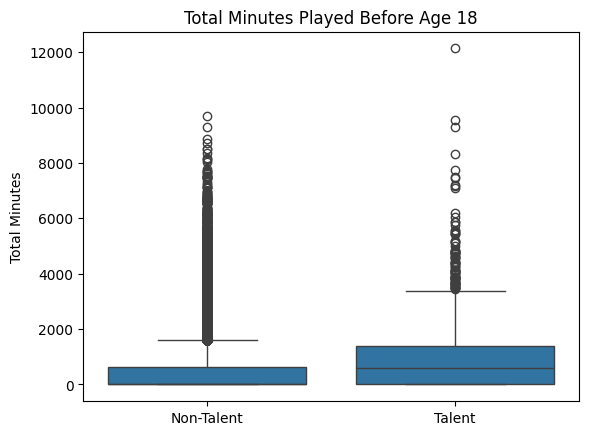

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    data=final_df,
    x="is_talent",
    y="total_minutes"
)
plt.xticks([0, 1], ["Non-Talent", "Talent"])
plt.title("Total Minutes Played Before Age 18")
plt.ylabel("Total Minutes")
plt.xlabel("")
plt.show()


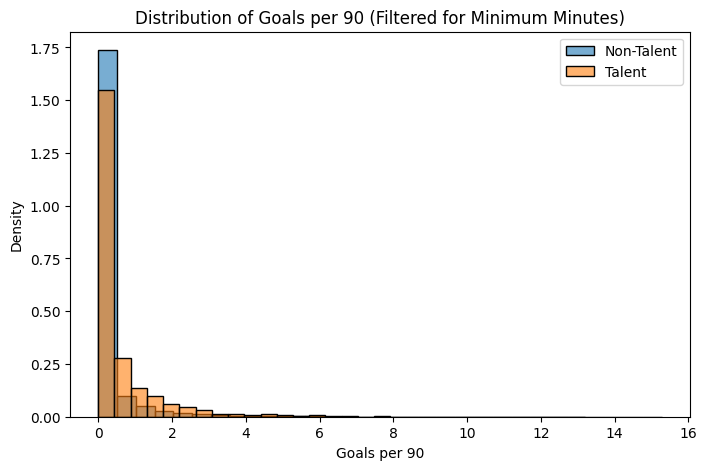

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.histplot(
    final_df[final_df["is_talent"] == 0]["goals_per_90"],
    bins=30,
    stat="density",
    label="Non-Talent",
    alpha=0.6
)

sns.histplot(
    final_df[final_df["is_talent"] == 1]["goals_per_90"],
    bins=30,
    stat="density",
    label="Talent",
    alpha=0.6
)

plt.title("Distribution of Goals per 90 (Filtered for Minimum Minutes)")
plt.xlabel("Goals per 90")
plt.ylabel("Density")
plt.legend()
plt.show()


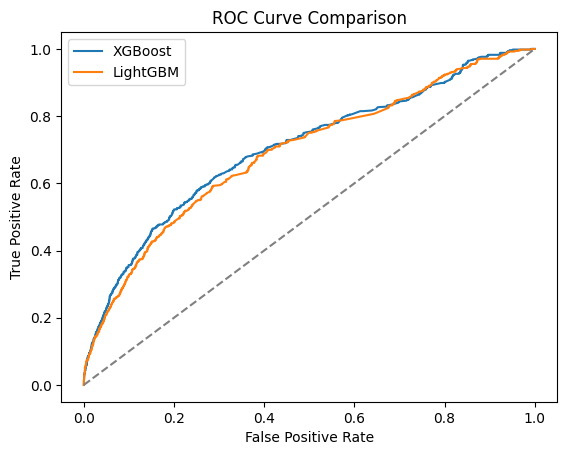

In [197]:
from sklearn.metrics import roc_curve

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_probs)

plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot(fpr_lgb, tpr_lgb, label="LightGBM")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


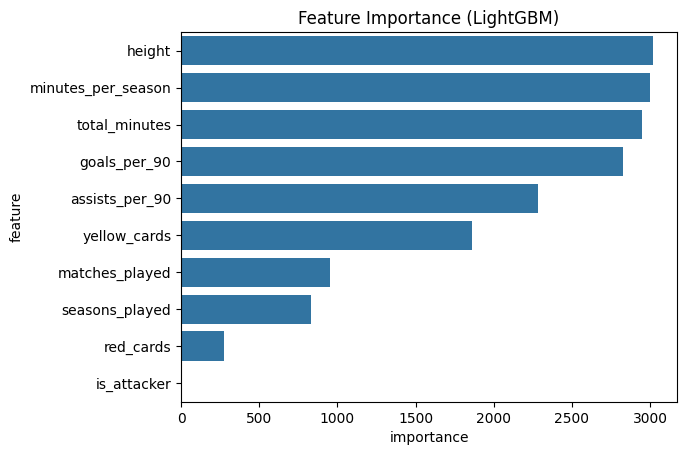

In [201]:
importance = pd.DataFrame({
    "feature": FEATURES,
    "importance": lgbm.feature_importances_
}).sort_values("importance", ascending=False)

sns.barplot(
    data=importance,
    x="importance",
    y="feature"
)
plt.title("Feature Importance (LightGBM)")
plt.show()


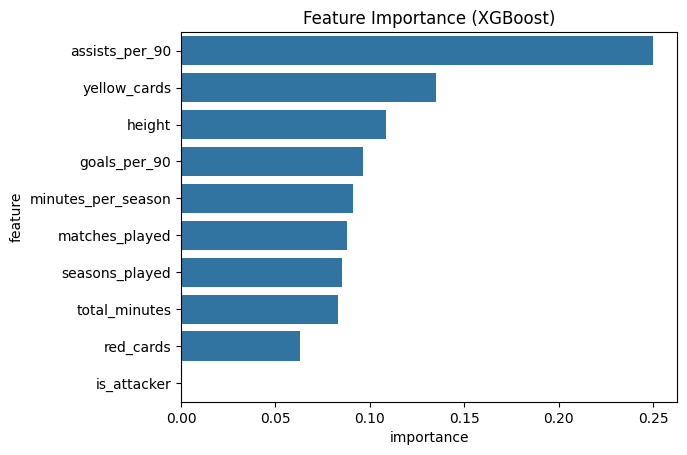

In [204]:
importance = pd.DataFrame({
    "feature": FEATURES,
    "importance": xgb.feature_importances_
}).sort_values("importance", ascending=False)

sns.barplot(
    data=importance,
    x="importance",
    y="feature"
)
plt.title("Feature Importance (XGBoost)")
plt.show()


/tmp/ipython-input-1914594719.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="")


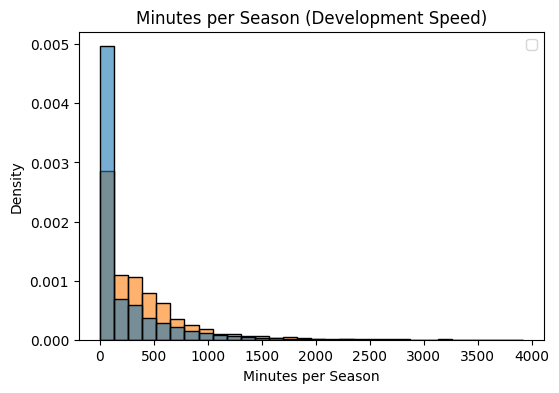

In [206]:
plt.figure(figsize=(6, 4))

sns.histplot(
    data=final_df,
    x="minutes_per_season",
    hue="is_talent",
    bins=30,
    stat="density",
    common_norm=False,
    alpha=0.6
)

plt.title("Minutes per Season (Development Speed)")
plt.xlabel("Minutes per Season")
plt.ylabel("Density")
plt.legend(title="")
plt.show()


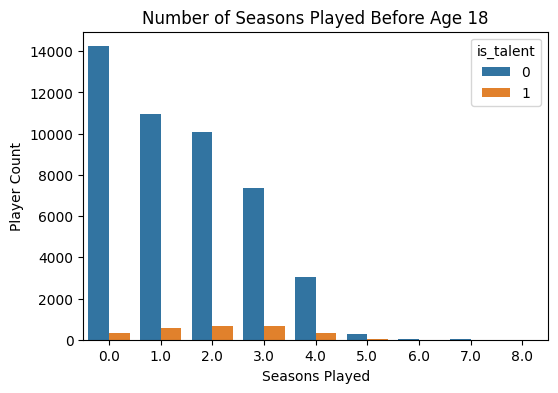

In [208]:
plt.figure(figsize=(6, 4))

sns.countplot(
    data=final_df,
    x="seasons_played",
    hue="is_talent"
)

plt.title("Number of Seasons Played Before Age 18")
plt.xlabel("Seasons Played")
plt.ylabel("Player Count")
plt.show()


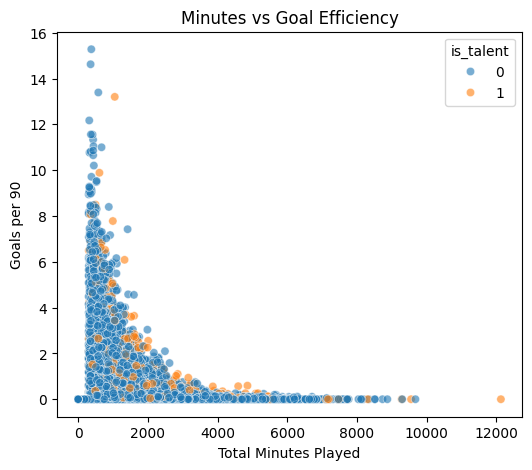

In [209]:
plt.figure(figsize=(6, 5))

sns.scatterplot(
    data=final_df,
    x="total_minutes",
    y="goals_per_90",
    hue="is_talent",
    alpha=0.6
)

plt.title("Minutes vs Goal Efficiency")
plt.xlabel("Total Minutes Played")
plt.ylabel("Goals per 90")
plt.show()
